# House Prices: Advanced Regression Techniques


## Project Setup:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
import seaborn as sns
from datetime import datetime

from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.ensemble import AdaBoostRegressor


from id3 import Id3Estimator
from id3 import export_graphviz
#import id3
from mlxtend.regressor import StackingRegressor
import stacking
#from stacking import stacking_regression
import xgboost as xgb
import lightgbm as lgb
#from keras import models
#from keras import layers
import keras
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

np.random.seed(42)
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [2]:
# To save figures later
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Importing data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

# A) **EDA** :

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


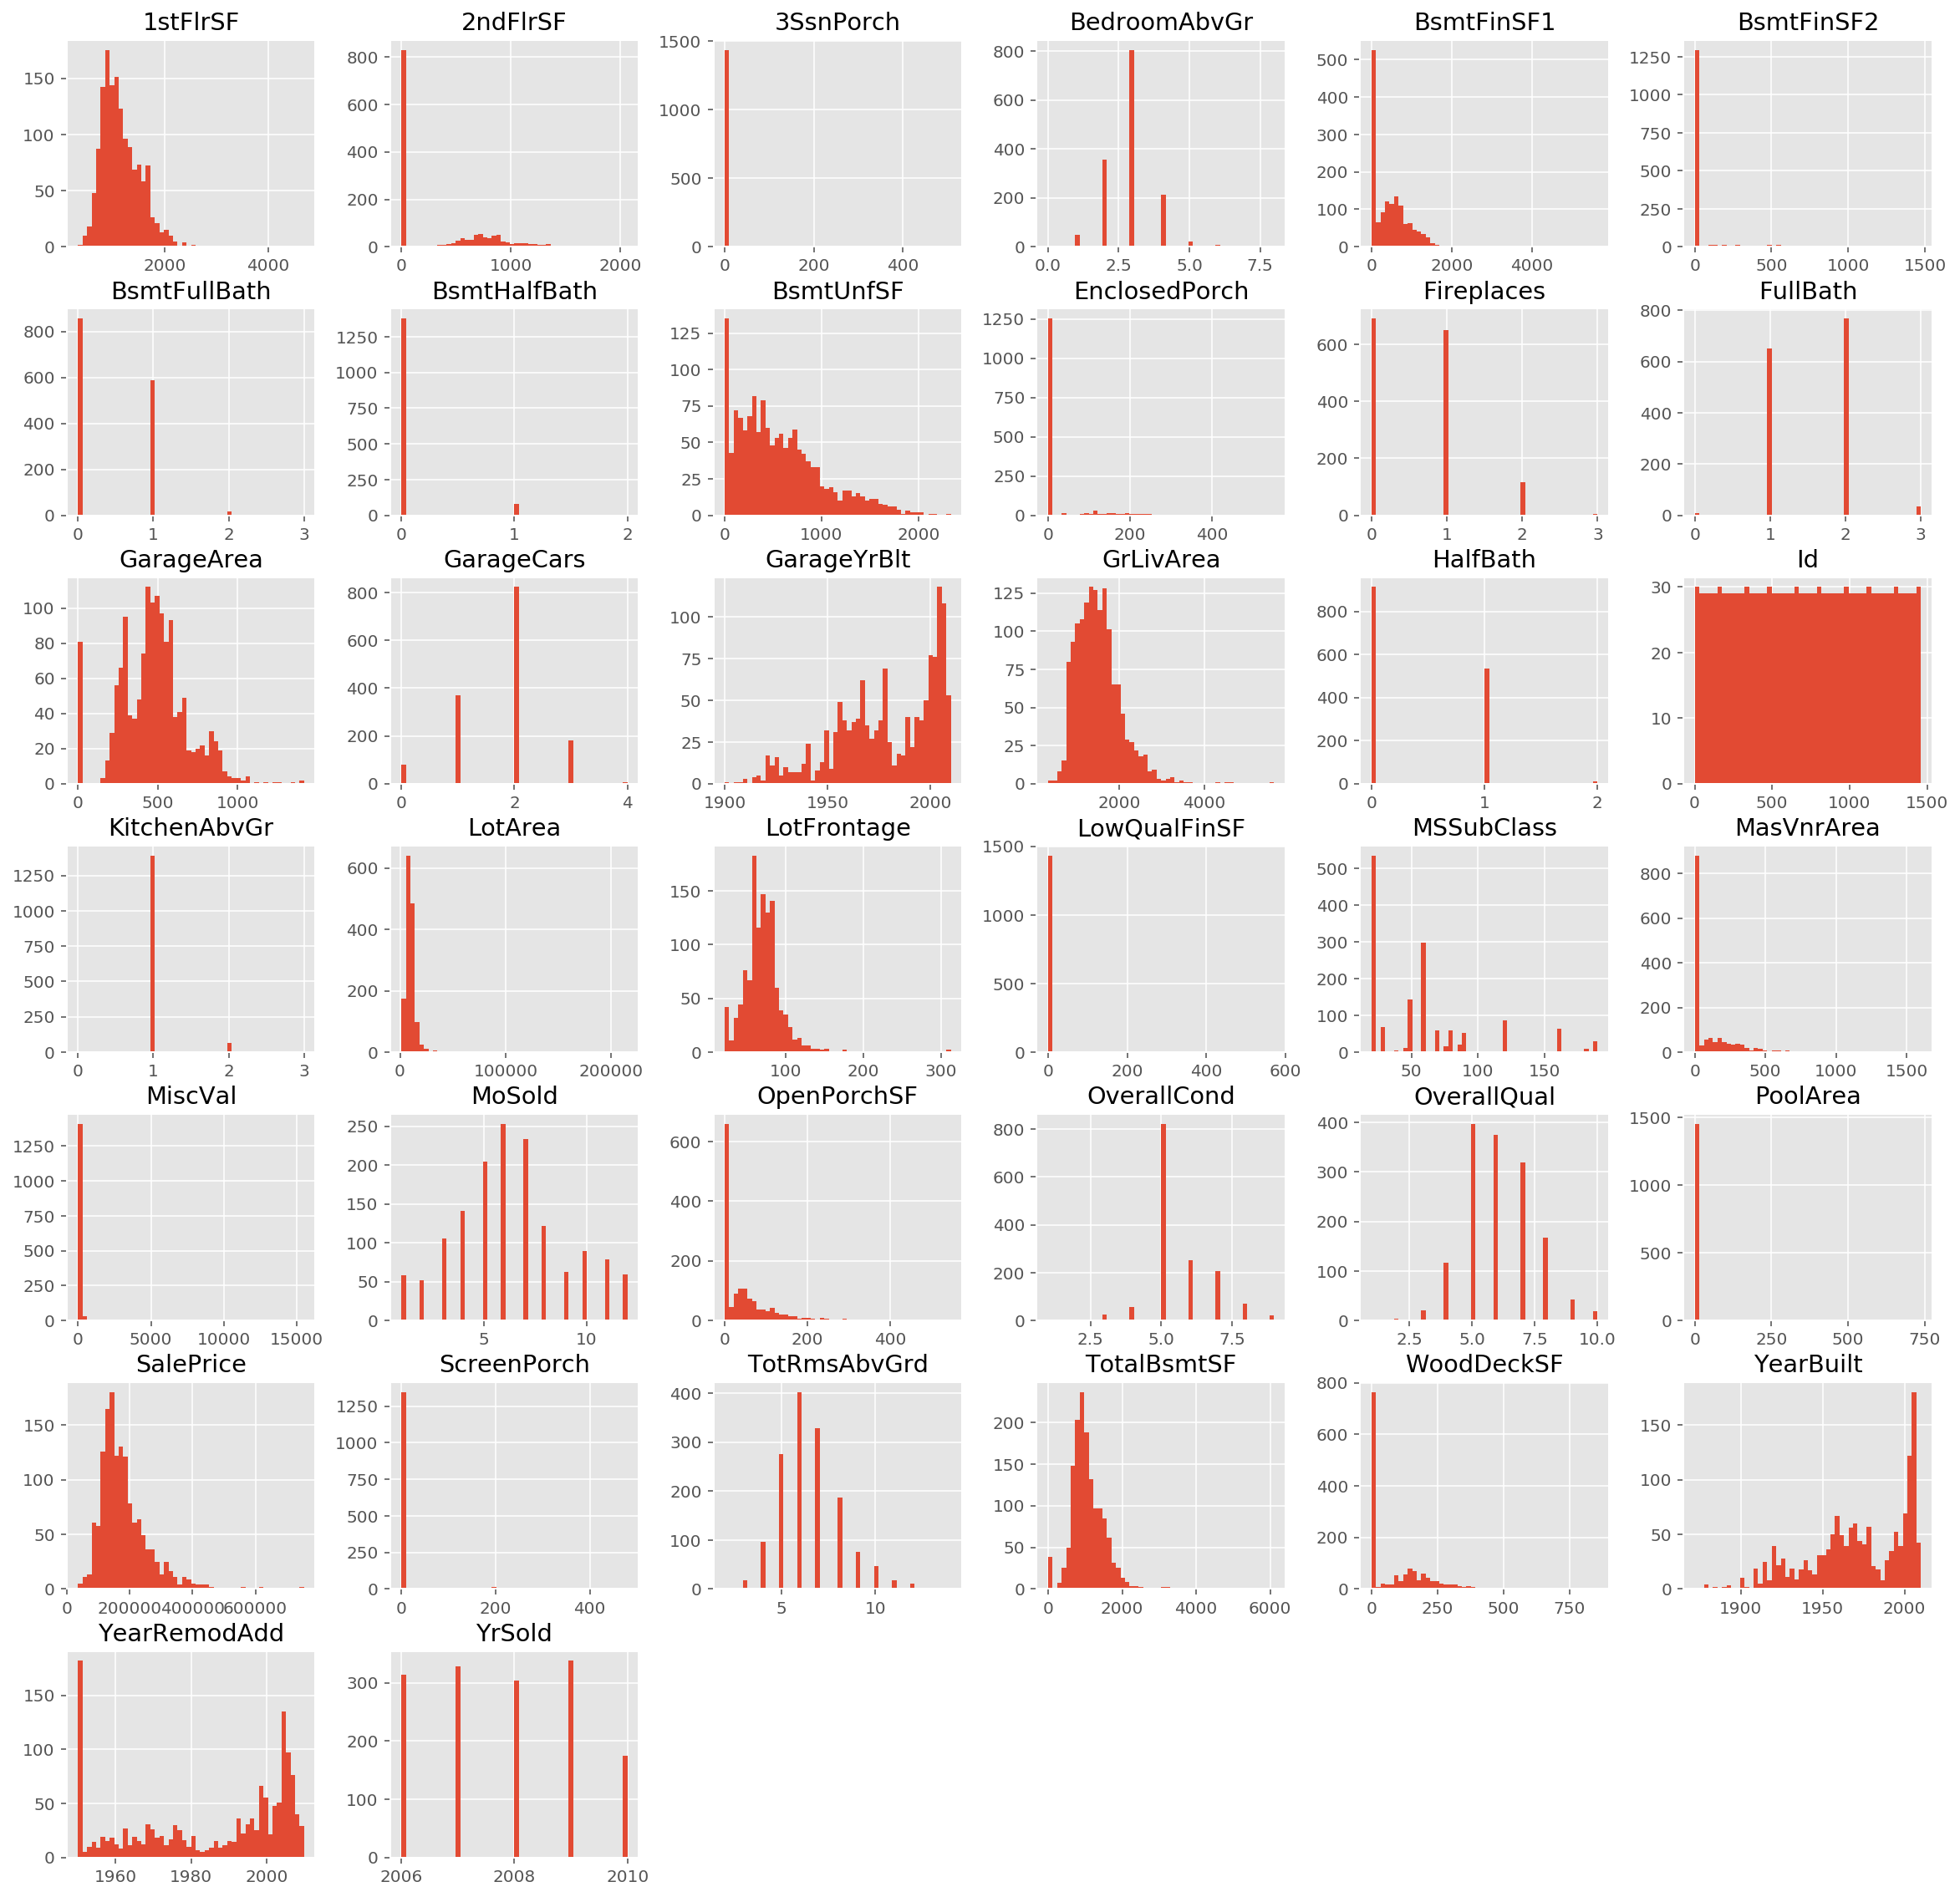

In [6]:
train.hist(bins=50, figsize=(20,20))
plt.show()

In [7]:
corr_matrix = train.corr()
#corr.abs().nlargest(10, "SalePrice")["SalePrice"]

corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

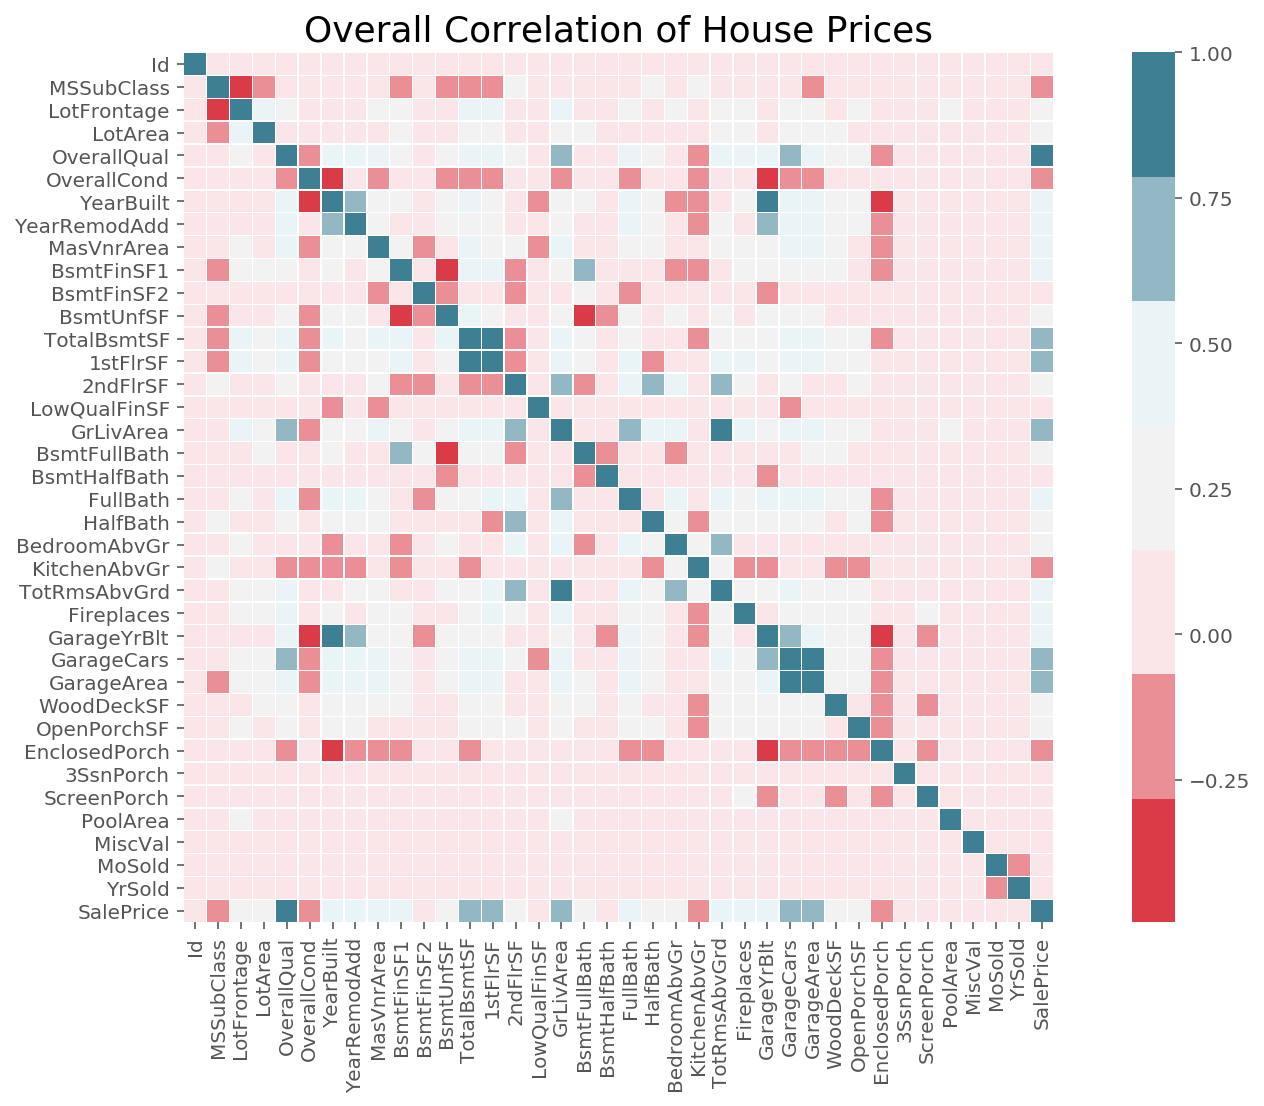

In [8]:
plt.figure(figsize=(14,8))
plt.title('Overall Correlation of House Prices', fontsize=18)
sns.heatmap(corr_matrix,annot=False,cmap=sns.diverging_palette(10, 220, sep=80, n=7),linewidths=0.2, square=True)
plt.show()

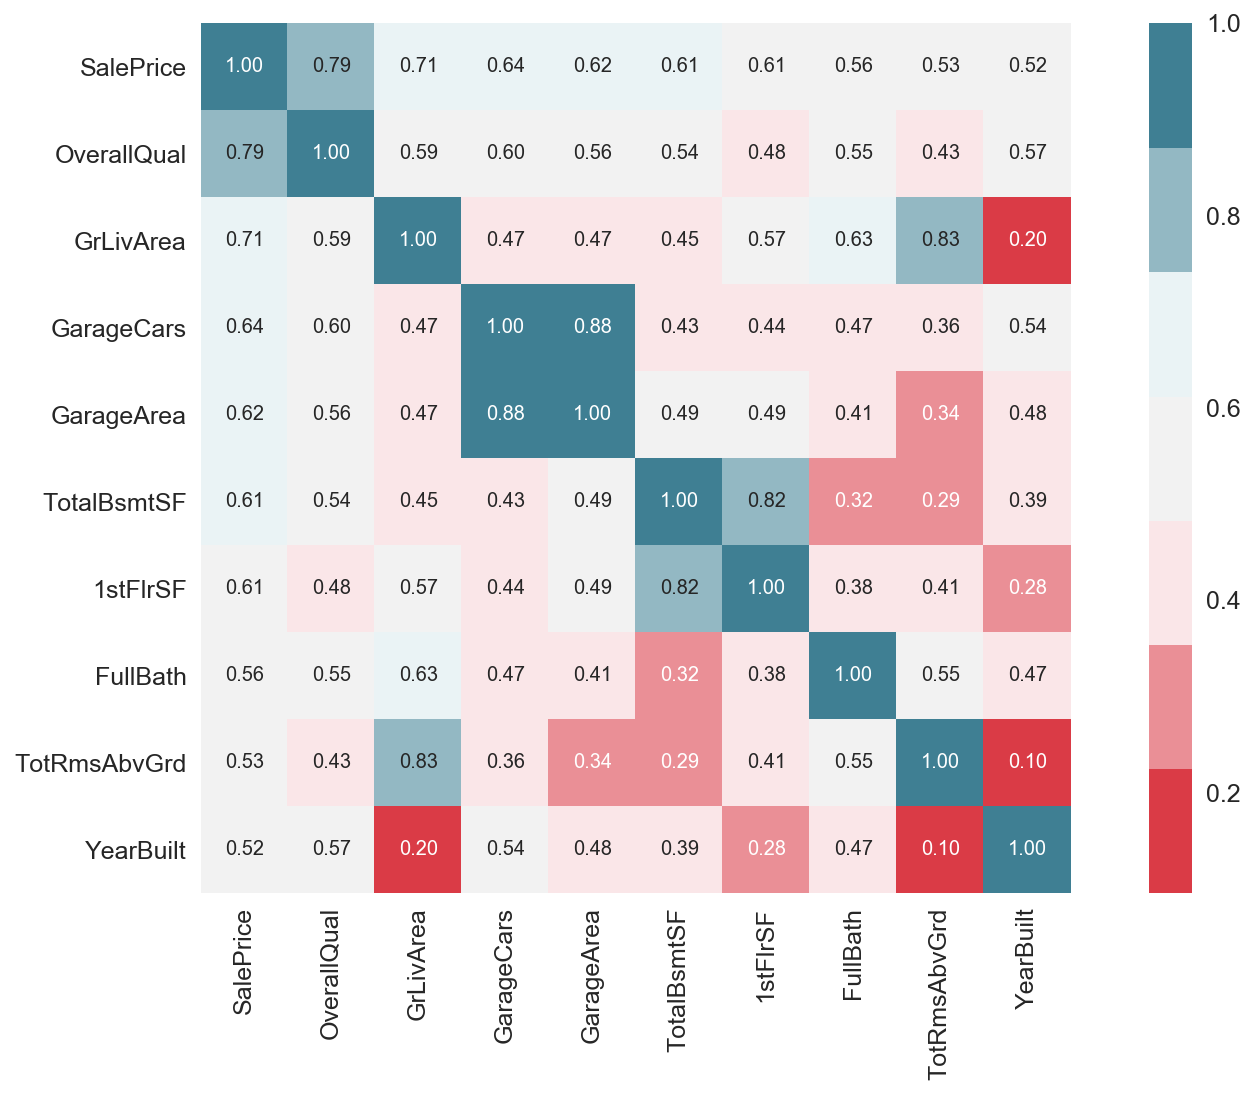

In [9]:
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(14,8))
hm = sns.heatmap(cm, cbar=True, annot=True, cmap=sns.diverging_palette(10, 220, sep=80, n=7), square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

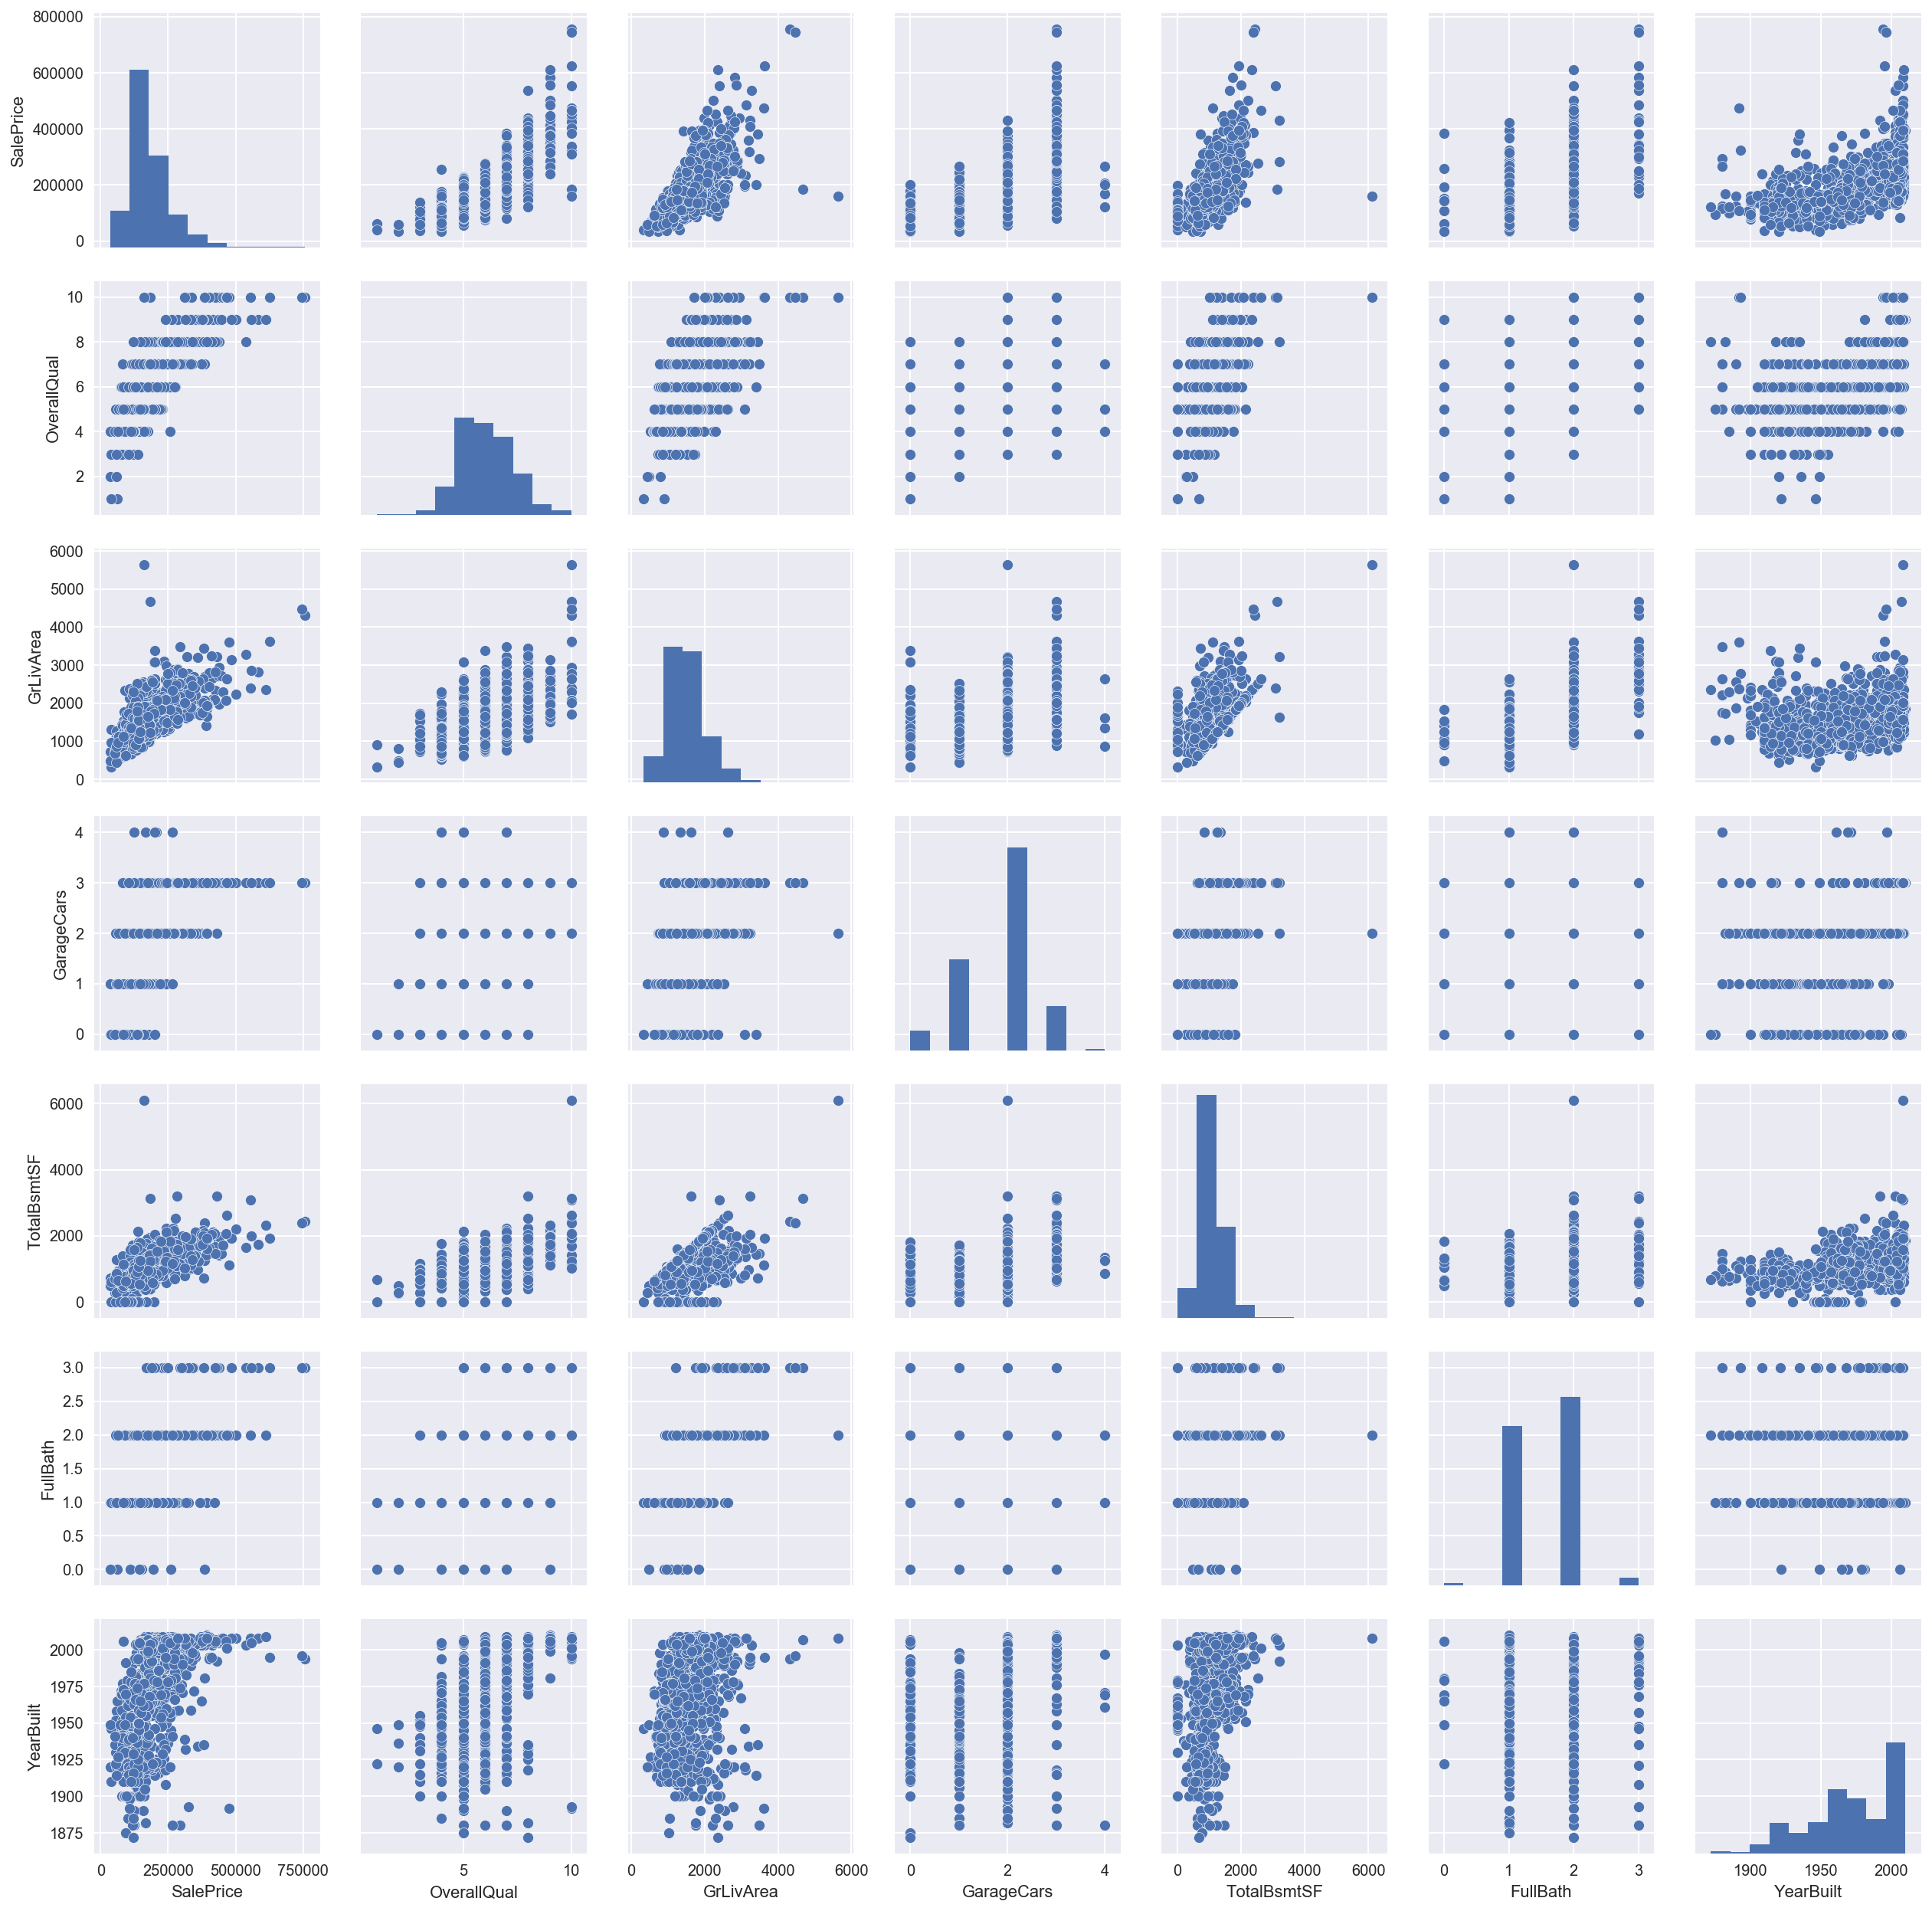

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.figure(figsize=(14,14))
plt.show();

* More on SalePrice :

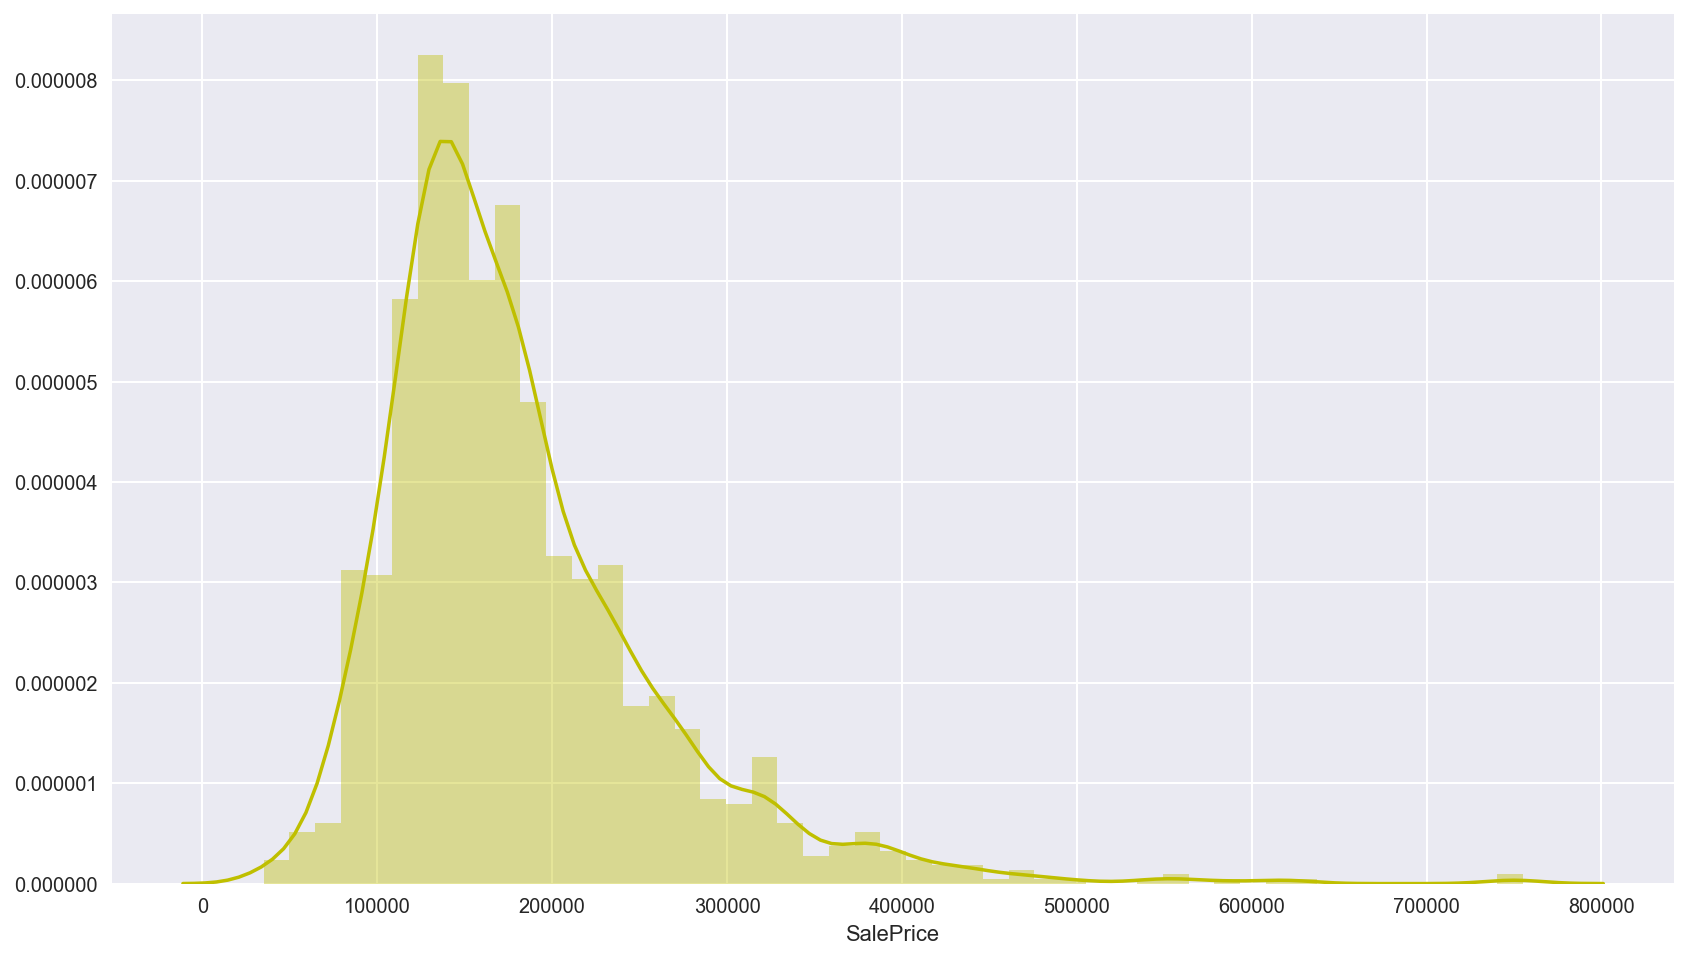

Skewness: 1.882876
Kurtosis: 6.536282


In [11]:
# As shown not normally distributed, right skewed - Will apply log transformation.
plt.figure(figsize=(14,8))
sns.distplot(train['SalePrice'], color='y')
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [14]:
#plt.figure(figsize=(14,8))
#sns.regplot(x = 'OverallQual', y = 'SalePrice', data = train, color = 'Orange')

-------------------------------------------
# B) **Feautre Engineering :**
 ### Missing Data, Encoding Categorical Data etc.

* Pulling IDs for Kaggle Submission

In [15]:
testIds = test.pop('Id')
trainIds = train.pop('Id')

* Fixing skewness in SalePrice

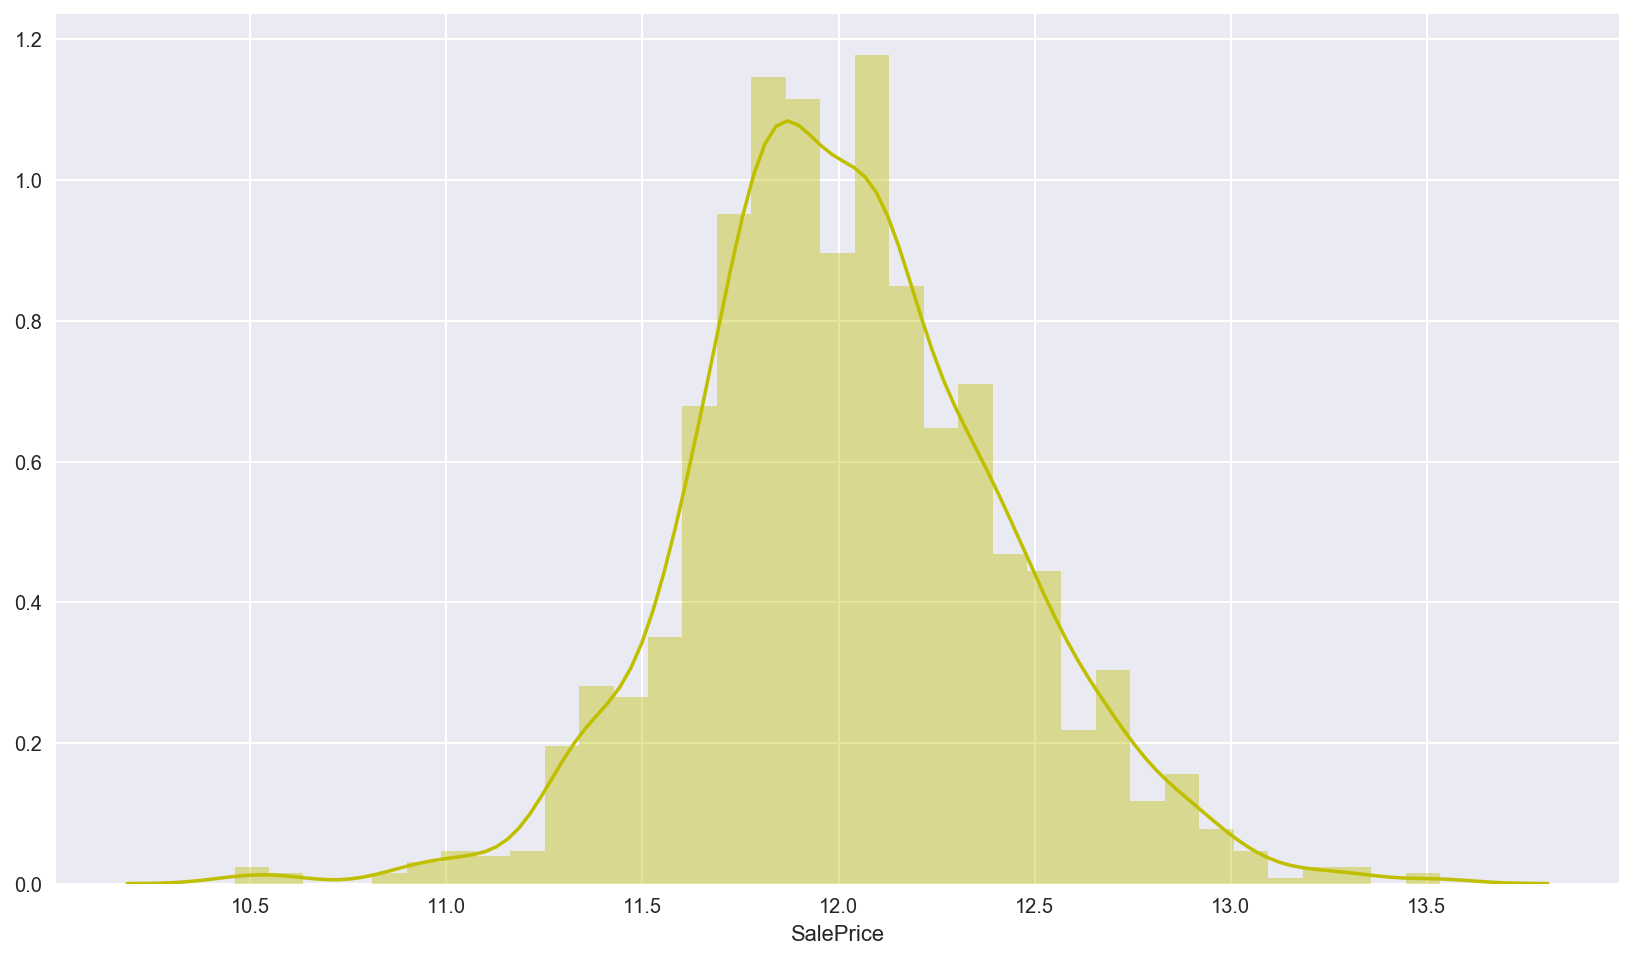

Skewness: 0.121347
Kurtosis: 0.809519
<class 'pandas.core.series.Series'>


In [16]:
#SalePrice_t = np.log1p(train['SalePrice'])
SalePrice_t = np.log1p(train.pop('SalePrice'))
plt.figure(figsize=(14,8))
sns.distplot(SalePrice_t, color='y')
plt.show()

#SalePrice_t.to_csv('SalePrice_t.csv', sep=',')
print("Skewness: %f" % SalePrice_t.skew())
print("Kurtosis: %f" % SalePrice_t.kurt())
print(type(SalePrice_t))

* Merging the test and train datasets to perform some feature engineering

In [17]:
All_Data = pd.concat([train, test], axis=0)
#All_Data.info() 2919

* Remove features where the percentage of missing data is more than 10%

In [18]:
# Calculating percentage of missing data per feature
total = All_Data.isnull().sum().sort_values(ascending=False)
percent = (All_Data.isnull().sum()/All_Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [19]:
All_Data = All_Data.drop((missing_data[missing_data['Percent'] > 0.10]).index,1)
All_Data.isnull().sum().max()

159

* Handling Some other missing values.

In [20]:
All_Data.loc[:, "Functional"] = All_Data.loc[:, "Functional"].fillna("Typ")
All_Data.loc[:, "KitchenQual"] = All_Data.loc[:, "KitchenQual"].fillna("TA")
All_Data.loc[:, "Utilities"] = All_Data.loc[:, "Utilities"].fillna("AllPub")
All_Data.loc[:, "BsmtFinType1"] = All_Data.loc[:, "BsmtFinType1"].fillna("No")
All_Data.loc[:, "BsmtFinType2"] = All_Data.loc[:, "BsmtFinType2"].fillna("No")
All_Data.loc[:, "BsmtUnfSF"] = All_Data.loc[:, "BsmtUnfSF"].fillna(0)
All_Data.loc[:, "BsmtFullBath"] = All_Data.loc[:, "BsmtFullBath"].fillna(0)
All_Data.loc[:, "BsmtHalfBath"] = All_Data.loc[:, "BsmtHalfBath"].fillna(0)
All_Data.loc[:, "GarageCars"] = All_Data.loc[:, "GarageCars"].fillna(0)
All_Data.loc[:, "GarageArea"] = All_Data.loc[:, "GarageArea"].fillna(0)
All_Data.loc[:, "GarageCond"] = All_Data.loc[:, "GarageCond"].fillna("No")
All_Data.loc[:, "GarageType"] = All_Data.loc[:, "GarageType"].fillna("No")
All_Data.loc[:, "GarageFinish"] = All_Data.loc[:, "GarageFinish"].fillna("No")
All_Data.loc[:, "GarageQual"] = All_Data.loc[:, "GarageQual"].fillna("No")
All_Data.loc[:, "BsmtFinType1"] = All_Data.loc[:, "BsmtFinType1"].fillna("No")
All_Data.loc[:, "BsmtFinType2"] = All_Data.loc[:, "BsmtFinType2"].fillna("No")
All_Data.loc[:, "BsmtExposure"] = All_Data.loc[:, "BsmtExposure"].fillna("No")
All_Data.loc[:, "BsmtQual"] = All_Data.loc[:, "BsmtQual"].fillna("No")
All_Data.loc[:, "BsmtCond"] = All_Data.loc[:, "BsmtCond"].fillna("No")
All_Data.loc[:, "MasVnrType"] = All_Data.loc[:, "MasVnrType"].fillna("None")
All_Data.loc[:, "MasVnrArea"] = All_Data.loc[:, "MasVnrArea"].fillna(0)

* Manually encoding some categorical variables

In [21]:
All_Data = All_Data.replace({
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

* Some numerical features should be categorical

In [22]:
All_Data = All_Data.replace({"MSSubClass" : {20 : "SC20", 
                                       30 : "SC30", 
                                       40 : "SC40", 
                                       45 : "SC45", 
                                       50 : "SC50", 
                                       60 : "SC60", 
                                       70 : "SC70", 
                                       75 : "SC75", 
                                       80 : "SC80", 
                                       85 : "SC85", 
                                       90 : "SC90", 
                                       120 : "SC120", 
                                       150 : "SC150", 
                                       160 : "SC160", 
                                       180 : "SC180", 
                                       190 : "SC190"},
                       "MoSold" : {1 : "Jan", 
                                   2 : "Feb", 
                                   3 : "Mar", 
                                   4 : "Apr", 
                                   5 : "May", 
                                   6 : "Jun",
                                   7 : "Jul", 
                                   8 : "Aug", 
                                   9 : "Sep", 
                                   10 : "Oct", 
                                   11 : "Nov", 
                                   12 : "Dec"}
                      })

* Fixing skewness in numerical data by using log transform (this will help in extracting more info from features)

In [23]:
# Selecting all numerical features (int64, float64)
All_Data_Numerical = All_Data[All_Data.select_dtypes(exclude = ["object"]).columns]

In [24]:
skewness = All_Data_Numerical.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
All_Data_Numerical[skewed_features] = np.log1p(All_Data_Numerical[skewed_features])

/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


* Replacing Missing values of GarageYrBlt and of other numerical variables with their median value

In [25]:
#from sklearn.preprocessing import Imputer
#imputer = Imputer(strategy="median")
#imputer.fit(All_Data_Numerical)
#X = imputer.transform(All_Data_Numerical)
#All_Data_Numerical.median().values

median = All_Data_Numerical["GarageYrBlt"].median()
All_Data_Numerical["GarageYrBlt"].fillna(median, inplace=True)

All_Data_Numerical = All_Data_Numerical.fillna(All_Data_Numerical.median())

print("Remaining NAs for numerical features in trainTest : " + str(All_Data_Numerical.isnull().values.sum()))

Remaining NAs for numerical features in trainTest : 0


/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


* Applying one hot coding for catergorical variables

In [26]:
# Selecting all categorical features not (int64, float64)
All_Data_Catergorical = All_Data[All_Data.select_dtypes(include = ["object"]).columns]

In [27]:
All_Data_Catergorical = pd.get_dummies(All_Data_Catergorical)

* Joining Catergorical and Numerical data after applying transformations

In [28]:
All_Data = pd.concat([All_Data_Numerical, All_Data_Catergorical], axis = 1)

* Seperating train and test datasets once again

In [29]:
train = All_Data.iloc[0:train.shape[0],:]
test = All_Data.iloc[train.shape[0]:,:]

In [30]:
train.shape, test.shape

((1460, 241), (1459, 241))

-----------------------------------
# C) Prediction Models 
### Preparations : 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train, SalePrice_t, test_size = 0.15, random_state = 0)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1241, 241)
X_test : (219, 241)
y_train : (1241,)
y_test : (219,)


In [32]:
stdSc = StandardScaler() # using StandardScaler, beacuse we already transformed the data
numerical_features = train.select_dtypes(exclude = ["object"]).columns
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])
test.loc[:, numerical_features] = stdSc.transform(test.loc[:,numerical_features])

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
# Evaluation 1
def tryModel(model, X_train, y_train, X_test, y_test):
    """
    model: a fitted sklearn model
    X_train: the training data used to train `model`
    y_train: the target data used to train `model`
    X_test: the test data for evaluating `model`
    y_test: the test target data for evaluating the `model`
    """
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    # Evaluate the rms error on the train set:
    rmse_log_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse_abs_train = np.sqrt(mean_squared_error(np.exp(y_train_pred), np.exp(y_train)))

    print  ("Training Set Errors:" \
           "\nTypical log error in housing sale price prediction: " + str(rmse_log_train) + \
           "\nTypical absolute error in housing sale price prediction: $" + str(rmse_abs_train))

    # Evaluate the rms error on the validation set:
    rmse_log = np.sqrt(mean_squared_error(y_test_pred, y_test))
    rmse_abs = np.sqrt(mean_squared_error(np.exp(y_test_pred), np.exp(y_test)))

    print  ("\nValidation Set Errors:" \
           "\nTypical log error in housing sale price prediction: " + str(rmse_log) + \
           "\nTypical absolute error in housing sale price prediction: $" + str(rmse_abs))

In [35]:
# Evaluation 2
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf, n_jobs=-1))
    return(rmse)

## - Statistical Models :

### DecisionTree :
*Scikit-learn uses an optimised version of the CART algorithm. We will also use DT with ID3 algorithm and compare.*

* CART algorithm :

In [36]:
tree_reg = DecisionTreeRegressor(random_state=0)

DecisionTree_trainedmodel = tree_reg.fit(X_train, y_train)

In [37]:
%%time
# 1st Eval
tryModel(DecisionTree_trainedmodel, X_train, y_train, X_test, y_test)

# 2nd Eval
score  = rmsle_cv(DecisionTree_trainedmodel)
print("Decision Tree Score = {:.5f} with std = {:.5f}".format(score.mean(), score.std()))

Training Set Errors:
Typical log error in housing sale price prediction: 2.25831815348e-05
Typical absolute error in housing sale price prediction: $4.59663604464

Validation Set Errors:
Typical log error in housing sale price prediction: 0.207575280068
Typical absolute error in housing sale price prediction: $40402.9467833
Decision Tree Score = 0.21481 with std = 0.01822
CPU times: user 105 ms, sys: 40 ms, total: 145 ms
Wall time: 319 ms


* ID3 algorithm

In [38]:
from id3 import Id3Estimator
from id3 import export_graphviz

DT_id3 = Id3Estimator()
DT_id3_trainedmodel = DT_id3.fit(X_train, y_train)
;

''

In [39]:
%%time

# 1st Eval
tryModel(DT_id3_trainedmodel, X_train, y_train, X_test, y_test)

# 2nd Eval
score  = rmsle_cv(DT_id3_trainedmodel)
print("Decision Tree Score : mean = {:.5f} with std = {:.5f}".format(score.mean(), score.std()))
;

Training Set Errors:
Typical log error in housing sale price prediction: 0.0
Typical absolute error in housing sale price prediction: $0.0

Validation Set Errors:
Typical log error in housing sale price prediction: 0.231512274825
Typical absolute error in housing sale price prediction: $47901.9910781
Decision Tree Score : mean = 0.24509 with std = 0.02752
CPU times: user 160 ms, sys: 54.4 ms, total: 215 ms
Wall time: 7.16 s


* As seen the CART algorithm outperforms the ID3 algorithm in DTs.


-----------------
### RandomForestRegressor :

* Grid Search to find best params :

In [40]:
# Grid Search
param_grid = [{'n_estimators' : [100, 500, 1000], 'max_features' : ['auto', 'sqrt'], 'max_depth' : [6, 10,15]},
              {'bootstrap':[False], 'n_estimators' : [50, 500, 1000], 'max_features' : ['auto', 'sqrt'], 'max_depth' : [10,15,20]}
             ]

RandomForest_grid = RandomForestRegressor()

grid_search_R = GridSearchCV(RandomForest_grid, param_grid, cv = 5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')
grid_search_R.fit(X_train, y_train)
;

''

In [41]:
print(grid_search_R.best_params_)
grid_search_R.best_estimator_ 

{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=20,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

* Training Model :

In [43]:
#RandomForestRegressor using ADaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
"""RandomForest = RandomForestRegressor(verbose=False,
                              max_depth=20,
                              max_features ='sqrt',
                              n_estimators=500,
                              n_jobs=6,
                              bootstrap = False,
                                     
                                    )"""
RandomForest = AdaBoostRegressor(grid_search_R.best_estimator_)


RandomForest_model = RandomForest.fit(X_train, y_train)

In [44]:
%%time

# 1st Eval
tryModel(RandomForest_model, X_train, y_train, X_test, y_test)

# 2nd Eval
score  = rmsle_cv(RandomForest_model)
print("Random Forest Score : mean = {:.5f} with std = {:.5f}".format(score.mean(), score.std()))

Training Set Errors:
Typical log error in housing sale price prediction: 0.0192603672537
Typical absolute error in housing sale price prediction: $3675.65245416

Validation Set Errors:
Typical log error in housing sale price prediction: 0.127621728303
Typical absolute error in housing sale price prediction: $30487.5413508
Random Forest Score : mean = 0.13247 with std = 0.01735
CPU times: user 6.28 s, sys: 89.7 ms, total: 6.37 s
Wall time: 1min 45s


--------------------------------
### Elastic Net :

* Grid Search to find best params :

In [ ]:
# Grid Search
param_grid = [{'random_state' : [0, 1, 2], 'l1_ratio' : [.9, .5, .1], 'alpha' : [1.0, 0.1, .001, 0.005]
               ,'max_iter' : [1000, 500, 1500]}
             ]

ElasticNet_grid = ElasticNet()

grid_search_E = GridSearchCV(ElasticNet_grid, param_grid, cv = 5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')
grid_search_E.fit(X_train, y_train)
;

In [ ]:
#ElasticNet_grid.get_params().keys()
#print(grid_search.best_params_)

'''ElasticNet(alpha=0.005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)'''

'''ElasticNet(alpha=0.005, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)'''

grid_search_E.best_estimator_ 

* Training Model :

In [ ]:
# Elastic Net
"""ENet = make_pipeline(RobustScaler(), 
                     ElasticNet(alpha=0.0005, 
                                l1_ratio=.9, 
                                random_state=0))"""

ENet = grid_search_E.best_estimator_ 

ENet_trainedmodel = ENet.fit(X_train, y_train)

In [ ]:
%%time

# 1st Eval
tryModel(ENet_trainedmodel, X_train, y_train, X_test, y_test)

# 2nd Eval
score  = rmsle_cv(ENet_trainedmodel)
print("Elastic Net Score : mean = {:.5f} with std = {:.5f}".format(score.mean(), score.std()))


-----------------------
### Lasso :

* Grid Search to find best params :

In [ ]:
# Grid Search
param_grid = [{'random_state' : [0, 1, 2, None], 'alpha' : [1.0, 0.1, .001, 0.005],
               'max_iter' : [1000, 500, 1500], 
               'fit_intercept' : [True, False], 
               'normalize' : [True, False], 
               'precompute' : [True, False], 
               'copy_X' : [True,False]
              }
             ]

lasso_grid = Lasso()

grid_search_L = GridSearchCV(lasso_grid, param_grid, cv = 5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')
grid_search_L.fit(X_train, y_train)
;

In [ ]:
#print(grid_search_L.best_params_)
grid_search_L.best_estimator_ 

Training Model :

In [ ]:
#lasso = Lasso(alpha =0.0005, random_state=1)

lasso = grid_search_L.best_estimator_ 

lasso_trainedmodel = lasso.fit(X_train, y_train)

In [ ]:
%%time

# 1st Eval
tryModel(lasso_trainedmodel, X_train, y_train, X_test, y_test)

# 2nd Eval
score  = rmsle_cv(lasso_trainedmodel)
print("GBoost Score : mean = {:.5f} with std = {:.5f}".format(score.mean(), score.std()))

------------------
### Ridge :

* Grid Search to find best params :

In [ ]:
param_grid = [{'random_state' : [0, 1, 2, None], 'alpha' : [1.0, 0.1, .001, 0.005],
               'max_iter' : [1000, 500, 1500], 
               'fit_intercept' : [True, False], 
               'normalize' : [True, False],  
               'copy_X' : [True,False]
              }
             ]

Ridge_grid = Ridge()

grid_search_Ridge = GridSearchCV(Ridge_grid, param_grid, cv = 5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')
grid_search_Ridge.fit(X_train, y_train)
;

* Training Model :

In [ ]:
Ridge = grid_search_Ridge.best_estimator_ 

Ridge_trainedmodel = Ridge.fit(X_train, y_train)

In [ ]:
%%time

# 1st Eval
tryModel(Ridge_trainedmodel, X_train, y_train, X_test, y_test)

# 2nd Eval
score  = rmsle_cv(Ridge_trainedmodel)
print("GBoost Score : mean = {:.5f} with std = {:.5f}".format(score.mean(), score.std()))

------------------
### LightGBM :

* Training Model :  (note grid search won't be optimal here due to the big number of params)

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',
                              num_leaves=5,
                              learning_rate=0.05, 
                              n_estimators=720,
                              max_bin = 55, 
                              bagging_fraction = 0.8,
                              bagging_freq = 5, 
                              feature_fraction = 0.2319,
                              feature_fraction_seed=9, 
                              bagging_seed=9,
                              min_data_in_leaf =6, 
                              min_sum_hessian_in_leaf = 11)

model_lgb_trainedmodel = model_lgb.fit(X_train, y_train)

In [ ]:
%%time

# 1st Eval
tryModel(model_lgb_trainedmodel, X_train, y_train, X_test, y_test)

# 2nd Eval
score  = rmsle_cv(model_lgb_trainedmodel)
print("GBoost Score : mean = {:.5f} with std = {:.5f}".format(score.mean(), score.std()))

--------------------------
### GBoost :


* Training Model :  (note grid search won't be optimal here due to the big number of params)

In [60]:
GBoost = GradientBoostingRegressor(n_estimators=3000, 
                                   learning_rate=0.005,
                                   max_depth=10, 
                                   max_features='sqrt',
                                   min_samples_leaf=15, 
                                   min_samples_split=10, 
                                   loss='huber', 
                                   random_state =0)
GBoost_trainedmodel = GBoost.fit(X_train, y_train)

In [61]:
%%time

# 1st Eval
tryModel(GBoost_trainedmodel, X_train, y_train, X_test, y_test)

# 2nd Eval
score  = rmsle_cv(GBoost_trainedmodel)
print("GBoost Score : mean = {:.5f} with std = {:.5f}".format(score.mean(), score.std()))

Training Set Errors:
Typical log error in housing sale price prediction: 0.0718884089467
Typical absolute error in housing sale price prediction: $16012.3852565

Validation Set Errors:
Typical log error in housing sale price prediction: 0.118620977091
Typical absolute error in housing sale price prediction: $27884.790709
GBoost Score : mean = 0.12294 with std = 0.01787
CPU times: user 1min 4s, sys: 158 ms, total: 1min 4s
Wall time: 1min 4s


-----------------------
### XGBoost : 

* Training Model :  (note grid search won't be optimal here due to the big number of params)

In [62]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, 
                             gamma=0.0468, 
                             learning_rate=0.05, 
                             max_depth=3, 
                             min_child_weight=1.7817, 
                             n_estimators=2200,
                             reg_alpha=0.4640, 
                             reg_lambda=0.8571,
                             subsample=0.5213, 
                             silent=1,
                             random_state =7, 
                             nthread = -1)


model_xgb_trainedmodel = model_xgb.fit(X_train, y_train)

In [63]:
%%time

# 1st Eval
tryModel(model_xgb_trainedmodel, X_train, y_train, X_test, y_test)

# 2nd Eval
score  = rmsle_cv(model_xgb_trainedmodel)
print("GBoost Score : mean = {:.5f} with std = {:.5f}".format(score.mean(), score.std()))



Training Set Errors:
Typical log error in housing sale price prediction: 0.0801868775311
Typical absolute error in housing sale price prediction: $16316.4951597

Validation Set Errors:
Typical log error in housing sale price prediction: 0.12448652537
Typical absolute error in housing sale price prediction: $29171.886211
GBoost Score : mean = 0.12330 with std = 0.01393
CPU times: user 46.3 s, sys: 13.8 s, total: 1min
Wall time: 16.2 s


------------- 
### SVM (Support Vector Machine) :

In [64]:
from sklearn.svm import SVR

svr = SVR(C=2, kernel='rbf')
svr.fit(X_train, y_train)

SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
score  = rmsle_cv(svr)
np.mean(score)

0.18771379917175751

--------------------
## Other Ensemble Methods :

### Stacking Regressors :

In [66]:
ensemble_model = StackingRegressor(regressors=[RandomForest, ENet, GBoost, model_xgb, model_lgb, Ridge,
                                            lasso], meta_regressor=SVR(kernel="rbf"))

ensemble_model.fit(X_train, y_train)

StackingRegressor(meta_regressor=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         refit=True,
         regressors=[AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=20,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_we...itive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)],
         store_train_meta_features=False, verbose=0)

In [67]:
score  = rmsle_cv(ensemble_model)
np.mean(score)

0.1238878832110593

----------------------------
### Averaging Models :

In [68]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [69]:
averaged_models = AveragingModels(models = (RandomForest, 
                                            ENet, 
                                            GBoost,  
                                            model_xgb,
                                            model_lgb,
                                            Ridge,
                                            lasso
                                           ))

# 1st Eval
#tryModel(averaged_models, X_train, y_train, X_test, y_test)

# 2nd Eval
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1208 (0.0167)



Since that's the best score : 

In [70]:
test_final = averaged_models.fit(X_train, y_train)
test_pred = test_final.predict(test)

In [71]:
sub = pd.DataFrame()
sub['Id'] = testIds
sub['SalePrice'] = np.expm1(test_pred)
sub.to_csv('submission.csv',index=False)

### Conclusion : using the trained models with the Averaging Models method yielded the best results that I submitted.


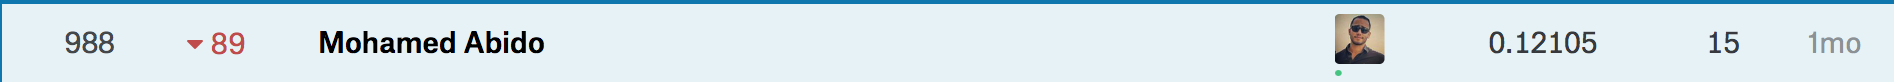

--------------------------
## - Neural Networks :

In [ ]:
X_train.shape

In [ ]:
# Model Difinition 

#from keras import models
#from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu',
                          input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss='mse', metrics=['mse'])
    return model

In [ ]:
import numpy as np

k = 5
num_val_samples = len(X_train) // k
num_epochs = 500
all_scores = []
    
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data.values, val_targets.values),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

In [ ]:
np.mean(all_scores)

In [ ]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(X_train.values, y_train.values,
          epochs=160, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test.values, y_test.values)

In [ ]:
test_mse_score

In [ ]:
test_mae_score

In [ ]:
test_pred = model.predict(test.values)

In [ ]:
sub = pd.DataFrame()
sub['Id'] = testIds
sub['SalePrice'] = np.expm1(test_pred)
sub.to_csv('submission_NeuralNetworks.csv',index=False)